In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
path ="/content/drive/MyDrive/YAZILIM/6 BSBI/Task2_Data_Clustering.txt"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,array([[5.1,3.5,1.4,0.2],Unnamed: 4
0,[4.9,3.0,1.4,0.2],NaN
1,[4.7,3.2,1.3,0.2],NaN
2,[4.6,3.1,1.5,0.2],NaN
3,[5.,3.6,1.4,0.2],NaN
4,[5.4,3.9,1.7,0.4],NaN


In [ ]:
df = df.drop(columns=['Unnamed: 4'])
df.head()

,array([[5.1,3.5,1.4,0.2]
0,[4.9,3.0,1.4,0.2]
1,[4.7,3.2,1.3,0.2]
2,[4.6,3.1,1.5,0.2]
3,[5.,3.6,1.4,0.2]
4,[5.4,3.9,1.7,0.4]


In [ ]:
df.columns = [f'column{i+1}' for i in range(df.shape[1])]
df.head()

,column1,column2,column3,column4
0,[4.9,3.0,1.4,0.2]
1,[4.7,3.2,1.3,0.2]
2,[4.6,3.1,1.5,0.2]
3,[5.,3.6,1.4,0.2]
4,[5.4,3.9,1.7,0.4]


In [ ]:
df = df.replace(r'[\[\]]', '', regex=True)

In [ ]:
df.head()

,column1,column2,column3,column4
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   column1  149 non-null    object 
 1   column2  149 non-null    float64
 2   column3  149 non-null    float64
 3   column4  149 non-null    object 
dtypes: float64(2), object(2)
memory usage: 4.8+ KB


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   column1  149 non-null    float64
 1   column2  149 non-null    float64
 2   column3  149 non-null    float64
 3   column4  148 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.isna().sum()

,0
column1,0
column2,0
column3,0
column4,1


In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

,0
column1,0
column2,0
column3,0
column4,0


In [ ]:
df.head()

,column1,column2,column3,column4
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [ ]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()

In [ ]:
df[['column1','column2','column3','column4' ]] = scaler.fit_transform(df[['column1','column2','column3','column4' ]])
df

,column1,column2,column3,column4
0,-1.144089,-0.125588,-1.345858,-1.320586
1,-1.385465,0.333352,-1.402769,-1.320586
2,-1.506153,0.103882,-1.288948,-1.320586
3,-1.023401,1.251232,-1.345858,-1.320586
4,-0.540649,1.939642,-1.175127,-1.057003
...,...,...,...,...
143,1.028294,0.562822,1.101297,1.710617
144,1.028294,-0.125588,0.816744,1.447034
145,0.545542,-1.272939,0.702923,0.919868
146,0.786918,-0.125588,0.816744,1.051660


In [ ]:
# Create function to work out optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

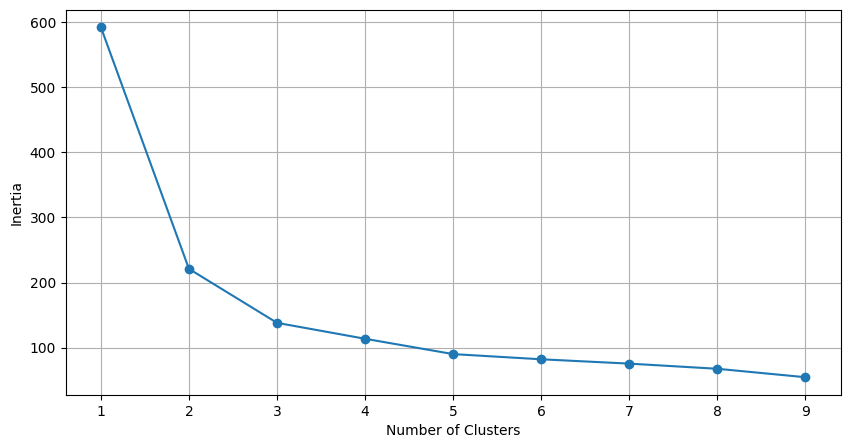

In [ ]:
optimise_k_means(df[['column1','column2','column3','column4',]], 10)

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(df[['column1','column2','column3','column4']])

KMeans(n_clusters=3)

In [ ]:
df['kmeans_3'] = kmeans.labels_
df

,column1,column2,column3,column4,kmeans_3
0,-1.144089,-0.125588,-1.345858,-1.320586,1
1,-1.385465,0.333352,-1.402769,-1.320586,1
2,-1.506153,0.103882,-1.288948,-1.320586,1
3,-1.023401,1.251232,-1.345858,-1.320586,1
4,-0.540649,1.939642,-1.175127,-1.057003,1
...,...,...,...,...,...
143,1.028294,0.562822,1.101297,1.710617,2
144,1.028294,-0.125588,0.816744,1.447034,2
145,0.545542,-1.272939,0.702923,0.919868,0
146,0.786918,-0.125588,0.816744,1.051660,2
